**Prerequisite** : Install "wbdata" library

**World Bank Data API:**

The World Bank offers a rich repository of data on global development, accessible via an API. This data includes economic, social, and environmental indicators for various countries and regions.
The API allows users to programmatically access this data, enabling easy integration into data analysis workflows.

**wbdata Library:**

wbdata is a Python wrapper for the World Bank API, making it easier to retrieve data without directly handling API requests.
It provides functions to search for indicators, fetch data, and convert it into pandas DataFrames for analysis.

In [2]:
# Import all the necessary libraries
import wbdata
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
from warnings import filterwarnings
filterwarnings("ignore")

below code will convert the integer year to a datetime object 

In [3]:
# Convert "year" from integer to datetime object
start_date ='2015-01-01'
end_date ='2020-12-31'

start_date_obj = datetime.strptime(start_date,"%Y-%m-%d")
end_date_obj = datetime.strptime(end_date,"%Y-%m-%d")

Listing all the G-20 Countries

In [4]:
# G-20 countries ISO codes
g20_countries = ['ARG', 'AUS', 'BRA', 'CAN', 'CHN', 'FRA', 'DEU', 'IND', 'IDN', 'ITA', 'JPN', 'MEX', 'RUS', 'SAU', 'ZAF', 'KOR', 'TUR', 'GBR', 'USA', 'EUU']

Listing all the Indicators which we are going to be analyzing

In [5]:
# Indicators
indicators = {
    'NY.GDP.MKTP.CD': 'Gross Domestic Product (GDP)',
    'NY.GNP.MKTP.CD': 'Gross National Income (GNI)',
    'FP.CPI.TOTL.ZG': 'Inflation rate',
    'SL.UEM.TOTL.ZS': 'Unemployment rate',
    'SI.POV.NAHC': 'Poverty rate',
    'SP.DYN.LE00.IN': 'Life expectancy',
    'SE.ADT.LITR.ZS': 'Literacy rate',
    'EG.ELC.ACCS.ZS': 'Access to electricity',
    'IT.CEL.SETS.P2': 'Mobile phone subscriptions',
    'SE.XPD.TOTL.GB.ZS': 'Government expenditure on education',
    'BX.KLT.DINV.WD.GD.ZS': 'Foreign direct investment (FDI)',
    'NE.EXP.GNFS.ZS': 'Exports of goods and services',
    'NE.IMP.GNFS.ZS': 'Imports of goods and services',
    'NE.GDI.TOTL.ZS': 'Gross capital formation',
    'AG.LND.AGRI.ZS': 'Agricultural land area',
    'AG.PRD.FOOD.XD': 'Agricultural production index'
}


In [6]:
# Fetch data using wbdata library
data = wbdata.get_dataframe(indicators, country=g20_countries, date=(start_date_obj, end_date_obj))

In [7]:
# Reset index to have a column for 'date' and 'country'
data.reset_index(inplace=True)

In [8]:
# Display the first few rows of the dataframe
print(data.head())

     country  date  Gross Domestic Product (GDP)  Gross National Income (GNI)  \
0  Argentina  2020                  3.857405e+11                 3.753441e+11   
1  Argentina  2019                  4.477547e+11                 4.301668e+11   
2  Argentina  2018                  5.248199e+11                 5.060940e+11   
3  Argentina  2017                  6.436284e+11                 6.272005e+11   
4  Argentina  2016                  5.575323e+11                 5.452516e+11   

   Inflation rate  Unemployment rate  Poverty rate  Life expectancy  \
0             NaN             11.460          42.0           75.892   
1             NaN              9.840          35.5           77.284   
2             NaN              9.220          32.0           76.999   
3             NaN              8.350          25.7           76.833   
4             NaN              8.085          30.3           76.308   

   Literacy rate  Access to electricity  Mobile phone subscriptions  \
0            Na

In [10]:
data.to_csv('df.csv', index=False)

In [11]:
# import data
df = pd.read_csv(r"C:\Users\acer\Desktop\Data_Analyst_Portfolio\project\df.csv")
df.head()

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020,3.857405e+11,3.753441e+11,NaN,11.460,42.0,75.892,NaN,100.000000,121.600189,12.42229,1.266169,16.605414,13.598284,14.415156,43.029265,108.57
1,Argentina,2019,4.477547e+11,4.301668e+11,NaN,9.840,35.5,77.284,NaN,100.000000,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,42.590779,112.42
2,Argentina,2018,5.248199e+11,5.060940e+11,NaN,9.220,32.0,76.999,NaN,99.993736,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,42.371536,97.51
3,Argentina,2017,6.436284e+11,6.272005e+11,NaN,8.350,25.7,76.833,NaN,100.000000,140.501461,13.26392,1.789365,11.320283,13.969318,18.212567,42.986381,105.91
4,Argentina,2016,5.575323e+11,5.452516e+11,NaN,8.085,30.3,76.308,NaN,99.899742,145.917957,13.35554,0.584749,12.527095,13.566793,17.663228,43.479495,100.95


In [12]:
# Shape of dataset
df.shape

(120, 18)

In [13]:
# Unique Countries 
data['country'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'Germany',
       'European Union', 'France', 'United Kingdom', 'Indonesia', 'India',
       'Italy', 'Japan', 'Korea, Rep.', 'Mexico', 'Russian Federation',
       'Saudi Arabia', 'Turkiye', 'United States', 'South Africa'],
      dtype=object)

In [14]:
data.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              120 non-null    object 
 1   date                                 120 non-null    object 
 2   Gross Domestic Product (GDP)         120 non-null    float64
 3   Gross National Income (GNI)          120 non-null    float64
 4   Inflation rate                       114 non-null    float64
 5   Unemployment rate                    120 non-null    float64
 6   Poverty rate                         42 non-null     float64
 7   Life expectancy                      120 non-null    float64
 8   Literacy rate                        25 non-null     float64
 9   Access to electricity                120 non-null    float64
 10  Mobile phone subscriptions           120 non-null    float64
 11  Government expenditure on education 

In [15]:
# Unique Columns
data.columns

Index(['country', 'date', 'Gross Domestic Product (GDP)',
       'Gross National Income (GNI)', 'Inflation rate', 'Unemployment rate',
       'Poverty rate', 'Life expectancy', 'Literacy rate',
       'Access to electricity', 'Mobile phone subscriptions',
       'Government expenditure on education',
       'Foreign direct investment (FDI)', 'Exports of goods and services',
       'Imports of goods and services', 'Gross capital formation',
       'Agricultural land area', 'Agricultural production index'],
      dtype='object')

In [16]:
data['date'].unique()

array(['2020', '2019', '2018', '2017', '2016', '2015'], dtype=object)

In [17]:
data['date'] = pd.to_datetime(data['date'])

In [18]:
data.head()

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020-01-01,3.857405e+11,3.753441e+11,NaN,11.460,42.0,75.892,NaN,100.000000,121.600189,12.42229,1.266169,16.605414,13.598284,14.415156,43.029265,108.57
1,Argentina,2019-01-01,4.477547e+11,4.301668e+11,NaN,9.840,35.5,77.284,NaN,100.000000,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,42.590779,112.42
2,Argentina,2018-01-01,5.248199e+11,5.060940e+11,NaN,9.220,32.0,76.999,NaN,99.993736,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,42.371536,97.51
3,Argentina,2017-01-01,6.436284e+11,6.272005e+11,NaN,8.350,25.7,76.833,NaN,100.000000,140.501461,13.26392,1.789365,11.320283,13.969318,18.212567,42.986381,105.91
4,Argentina,2016-01-01,5.575323e+11,5.452516e+11,NaN,8.085,30.3,76.308,NaN,99.899742,145.917957,13.35554,0.584749,12.527095,13.566793,17.663228,43.479495,100.95


## Exploratory Data Analysis

In [19]:
data.head()

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020-01-01,3.857405e+11,3.753441e+11,NaN,11.460,42.0,75.892,NaN,100.000000,121.600189,12.42229,1.266169,16.605414,13.598284,14.415156,43.029265,108.57
1,Argentina,2019-01-01,4.477547e+11,4.301668e+11,NaN,9.840,35.5,77.284,NaN,100.000000,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,42.590779,112.42
2,Argentina,2018-01-01,5.248199e+11,5.060940e+11,NaN,9.220,32.0,76.999,NaN,99.993736,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,42.371536,97.51
3,Argentina,2017-01-01,6.436284e+11,6.272005e+11,NaN,8.350,25.7,76.833,NaN,100.000000,140.501461,13.26392,1.789365,11.320283,13.969318,18.212567,42.986381,105.91
4,Argentina,2016-01-01,5.575323e+11,5.452516e+11,NaN,8.085,30.3,76.308,NaN,99.899742,145.917957,13.35554,0.584749,12.527095,13.566793,17.663228,43.479495,100.95


In [21]:
# Statistical Description of data
data.describe().T

,count,mean,min,25%,50%,75%,max,std
date,120,2017-07-02 04:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-07-02 12:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,NaN
Gross Domestic Product (GDP),120.0,3938840086132.133301,323585509674.481018,1117383277862.429932,1734549340248.975098,3035329785525.4375,21380976119000.0,5302955145172.208984
Gross National Income (GNI),120.0,3958950334187.297363,315294109648.645996,1084453923317.037598,1727634067692.77002,3006598309177.58252,21760847000000.0,5363756568750.421875
Inflation rate,114.0,2.827178,-2.093333,0.989193,1.916184,3.608422,16.332464,3.188752
Unemployment rate,120.0,7.424126,2.35,4.31,5.7,9.175,25.54,4.786062
Poverty rate,42.0,17.221429,0.0,10.975,14.35,20.25,43.9,11.326712
Life expectancy,120.0,77.603984,63.95,74.392,78.0225,82.062195,84.56,5.174936
Literacy rate,25.0,95.089837,87.046669,94.472282,95.328629,96.150528,99.349098,2.373433
Access to electricity,120.0,98.728557,83.9,99.761203,100.0,100.0,100.0,3.553318
Mobile phone subscriptions,120.0,119.459259,75.673244,102.92444,119.668948,132.823991,166.943321,22.613613


Adding new columns for GDP and GNI in billions to your DataFrame using the wbdata librar

In [22]:
data['GDP_BN'] = data['Gross Domestic Product (GDP)']/(10**9)
data['GNI_BN'] = data['Gross National Income (GNI)']/(10**9)

In [23]:
selected_cols = data.columns[4:]

In [24]:
selected_cols

Index(['Inflation rate', 'Unemployment rate', 'Poverty rate',
       'Life expectancy', 'Literacy rate', 'Access to electricity',
       'Mobile phone subscriptions', 'Government expenditure on education',
       'Foreign direct investment (FDI)', 'Exports of goods and services',
       'Imports of goods and services', 'Gross capital formation',
       'Agricultural land area', 'Agricultural production index', 'GDP_BN',
       'GNI_BN'],
      dtype='object')

In [25]:
data[selected_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Inflation rate,114.0,2.827178,3.188752,-2.093333,0.989193,1.916184,3.608422,16.332464
Unemployment rate,120.0,7.424126,4.786062,2.350000,4.310000,5.700000,9.175000,25.540000
Poverty rate,42.0,17.221429,11.326712,0.000000,10.975000,14.350000,20.250000,43.900000
Life expectancy,120.0,77.603984,5.174936,63.950000,74.392000,78.022500,82.062195,84.560000
Literacy rate,25.0,95.089837,2.373433,87.046669,94.472282,95.328629,96.150528,99.349098
Access to electricity,120.0,98.728557,3.553318,83.900000,99.761203,100.000000,100.000000,100.000000
Mobile phone subscriptions,120.0,119.459259,22.613613,75.673244,102.924440,119.668948,132.823991,166.943321
Government expenditure on education,113.0,12.554700,3.362164,2.195997,9.638202,12.422290,14.890553,21.078785
Foreign direct investment (FDI),120.0,1.966866,1.596369,-0.898590,0.903770,1.757347,2.638623,12.078853
Exports of goods and services,120.0,27.299917,10.315013,10.209229,18.770135,27.620495,32.332227,49.403655


In [26]:
# round all the values
data[selected_cols].describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Inflation rate,114.0,3.0,3.0,-2.0,1.0,2.0,4.0,16.0
Unemployment rate,120.0,7.0,5.0,2.0,4.0,6.0,9.0,26.0
Poverty rate,42.0,17.0,11.0,0.0,11.0,14.0,20.0,44.0
Life expectancy,120.0,78.0,5.0,64.0,74.0,78.0,82.0,85.0
Literacy rate,25.0,95.0,2.0,87.0,94.0,95.0,96.0,99.0
Access to electricity,120.0,99.0,4.0,84.0,100.0,100.0,100.0,100.0
Mobile phone subscriptions,120.0,119.0,23.0,76.0,103.0,120.0,133.0,167.0
Government expenditure on education,113.0,13.0,3.0,2.0,10.0,12.0,15.0,21.0
Foreign direct investment (FDI),120.0,2.0,2.0,-1.0,1.0,2.0,3.0,12.0
Exports of goods and services,120.0,27.0,10.0,10.0,19.0,28.0,32.0,49.0


### Distribution : Histogram

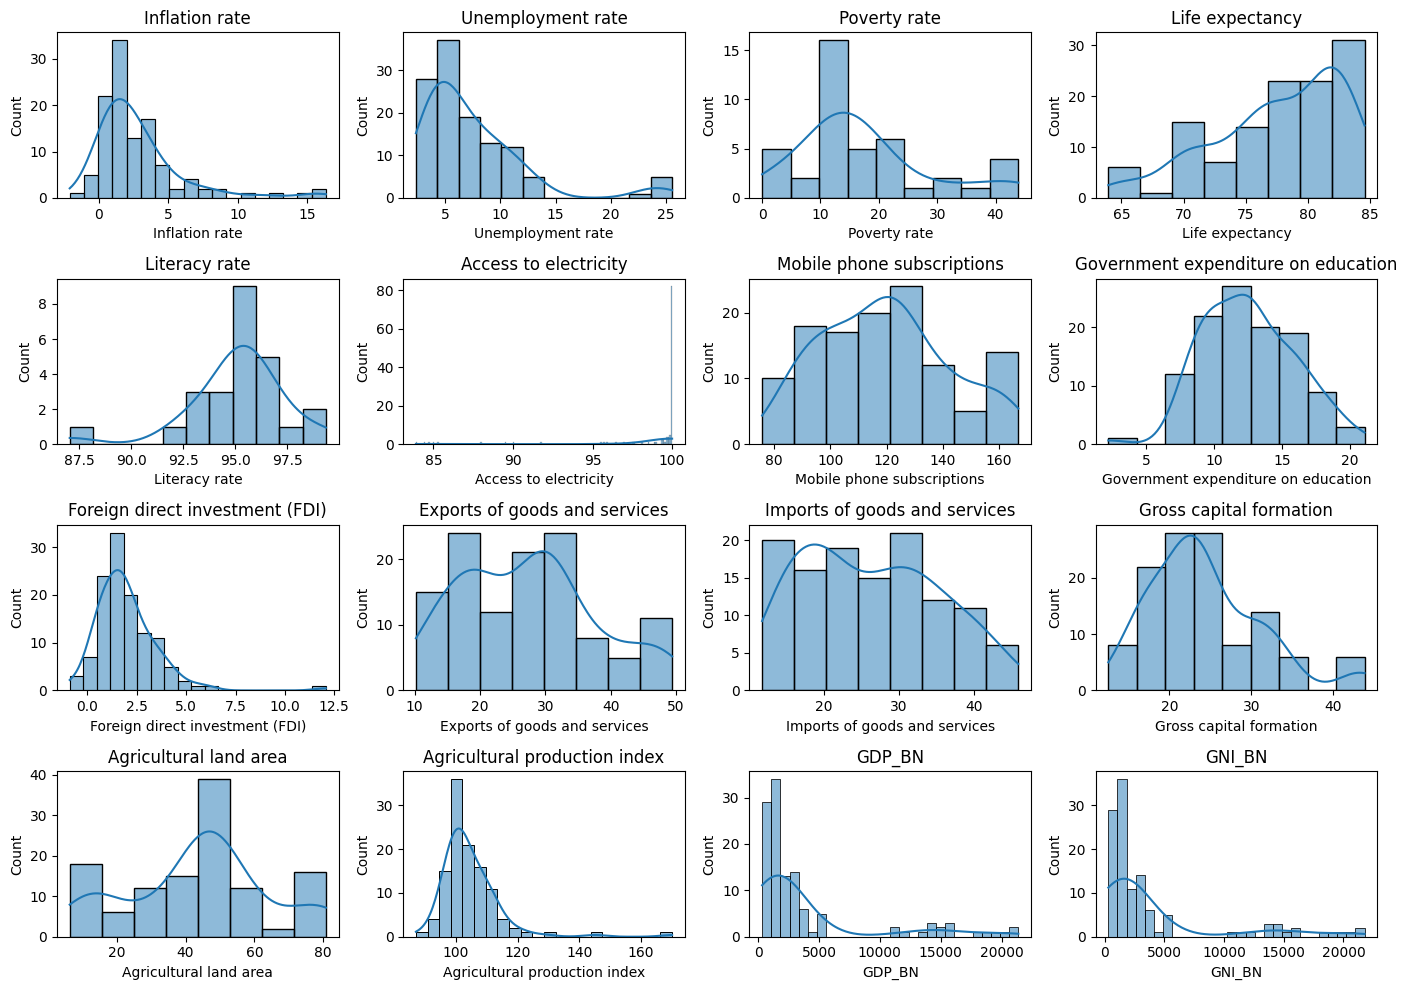

In [27]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()

for i, col in enumerate(selected_cols):
    sns.histplot(data=data, x=col, kde=True, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

### Checking for Skewness 

In [28]:
data[selected_cols].skew().sort_values()

Access to electricity                 -3.216844
Literacy rate                         -1.419846
Life expectancy                       -0.766069
Agricultural land area                -0.059411
Government expenditure on education    0.184313
Mobile phone subscriptions             0.274879
Imports of goods and services          0.277249
Exports of goods and services          0.372476
Gross capital formation                0.960201
Poverty rate                           1.010017
GDP_BN                                 2.051206
GNI_BN                                 2.064089
Unemployment rate                      2.160163
Inflation rate                         2.262253
Foreign direct investment (FDI)        2.460554
Agricultural production index          3.401860
dtype: float64

### Outlier Proportion

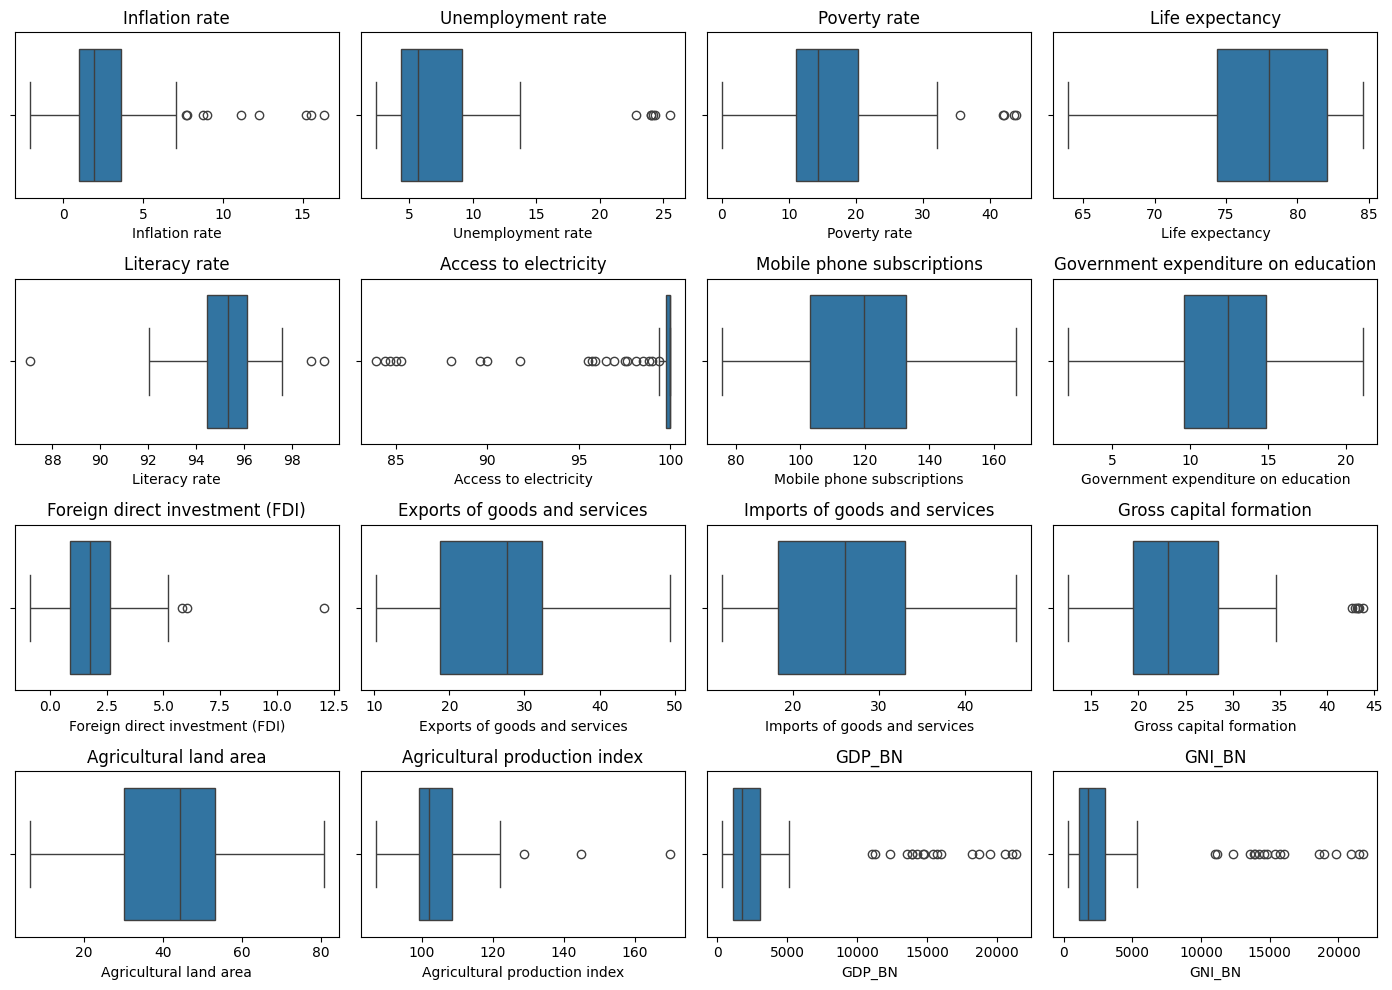

In [29]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()

for i, col in enumerate(selected_cols):
    sns.boxplot(data=data, x=col,ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

### Proportion of Outliers

Calculating 5 Number Summary in order to detect outliers

In [30]:
def outlier(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (x < lower_bound) | (x > upper_bound)

In [31]:
outlier_percentages = []

for col in selected_cols:
    x = data[col]
    outliers = outlier(x) 
    outlier_percentage = np.mean(outliers) * 100
    outlier_percentages.append(outlier_percentage)

result_df = pd.DataFrame({'Column': selected_cols, 'Outlier Percentage': outlier_percentages})
result_df = result_df.sort_values('Outlier Percentage', ascending=False)

print(result_df)

                                 Column  Outlier Percentage
5                 Access to electricity                17.5
14                               GDP_BN                15.0
15                               GNI_BN                15.0
1                     Unemployment rate                 5.0
11              Gross capital formation                 5.0
8       Foreign direct investment (FDI)                 2.5
0                        Inflation rate                 0.0
2                          Poverty rate                 0.0
3                       Life expectancy                 0.0
4                         Literacy rate                 0.0
6            Mobile phone subscriptions                 0.0
7   Government expenditure on education                 0.0
9         Exports of goods and services                 0.0
10        Imports of goods and services                 0.0
12               Agricultural land area                 0.0
13        Agricultural production index 

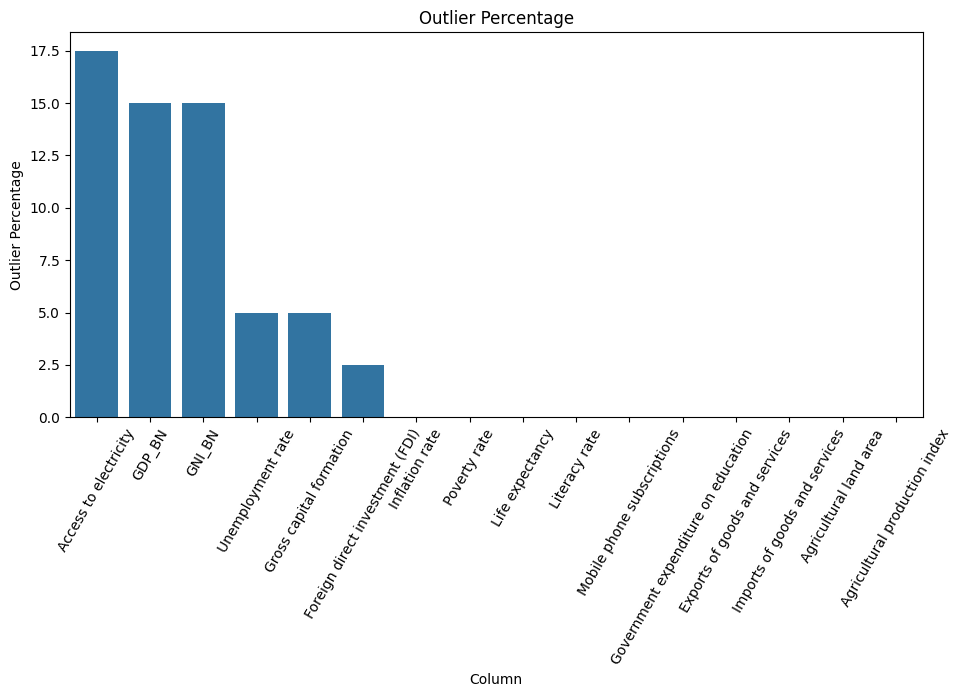

In [35]:
plt.figure(figsize=(11,5))
sns.barplot(x=result_df['Column'], y=result_df['Outlier Percentage'])
plt.title("Outlier Percentage")
plt.xticks(rotation=60)
plt.show()

### Null Values

Checking for Null Values

In [36]:
data.isnull().sum()

country                                 0
date                                    0
Gross Domestic Product (GDP)            0
Gross National Income (GNI)             0
Inflation rate                          6
Unemployment rate                       0
Poverty rate                           78
Life expectancy                         0
Literacy rate                          95
Access to electricity                   0
Mobile phone subscriptions              0
Government expenditure on education     7
Foreign direct investment (FDI)         0
Exports of goods and services           0
Imports of goods and services           0
Gross capital formation                 0
Agricultural land area                  0
Agricultural production index           6
GDP_BN                                  0
GNI_BN                                  0
dtype: int64

### Imputing missing values with median

In [37]:
data['Poverty rate'] = data['Poverty rate'].fillna(data['Poverty rate'].median())
data['Inflation rate'] = data['Inflation rate'].fillna(data['Inflation rate'].median())
data['Literacy rate'] = data['Literacy rate'].fillna(data['Literacy rate'].median())
data['Government expenditure on education'] = data['Government expenditure on education'].fillna(data['Government expenditure on education'].median())
data['Agricultural production index'] = data['Agricultural production index'].fillna(data['Agricultural production index'].median())

### Correlation

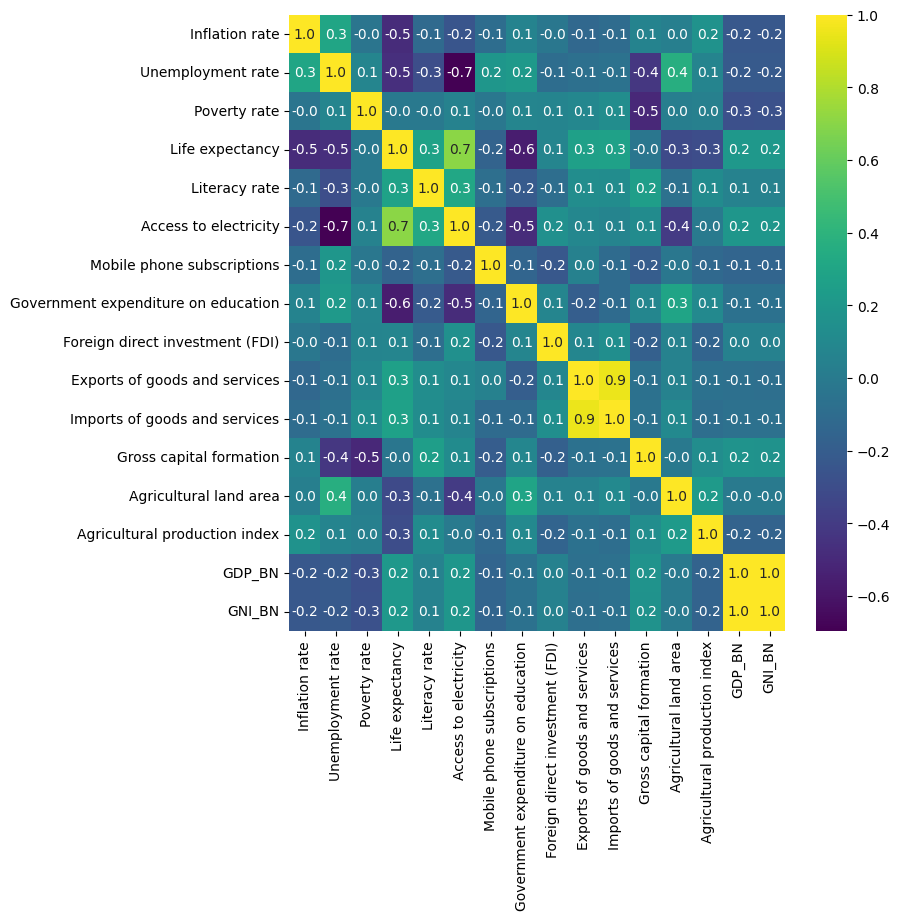

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(data[selected_cols].corr(), annot=True, fmt='.1f', cmap="viridis")
plt.show()

Getting top 3 countries for given parameters

In [43]:
def top_3(data, parameter):
    year_list = data['date'].dt.year.sort_values().unique()
    result_df = pd.DataFrame(columns=year_list,index=[1,2,3])
    
    for year in year_list:
        df_year = data[data['date'].dt.year == year]
        value = df_year.groupby('country')[parameter].sum().sort_values(ascending=False).head(3).index
        result_df[year] = value
    
    return result_df

In [44]:
from IPython.display import display

In [45]:
for i in selected_cols:
    result = top_3(data,i)
    print(i)
    display(result)
    print('-------------------------------------------------')

Inflation rate


,2015,2016,2017,2018,2019,2020
1,Russian Federation,Brazil,Turkiye,Turkiye,Turkiye,Turkiye
2,Brazil,Turkiye,Mexico,Mexico,Russian Federation,India
3,Turkiye,Russian Federation,South Africa,South Africa,South Africa,Saudi Arabia


-------------------------------------------------
Unemployment rate


,2015,2016,2017,2018,2019,2020
1,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
2,Italy,Italy,Brazil,Brazil,Turkiye,Brazil
3,France,Brazil,Italy,Turkiye,Brazil,Turkiye


-------------------------------------------------
Poverty rate


,2015,2016,2017,2018,2019,2020
1,Italy,Mexico,Argentina,Mexico,Argentina,Mexico
2,Australia,Argentina,Italy,Argentina,Italy,Argentina
3,United Kingdom,Italy,United Kingdom,Italy,Germany,Italy


-------------------------------------------------
Life expectancy


,2015,2016,2017,2018,2019,2020
1,Japan,Japan,Japan,Japan,Japan,Japan
2,Italy,Italy,Italy,Italy,Italy,"Korea, Rep."
3,Australia,France,"Korea, Rep.",Australia,"Korea, Rep.",Australia


-------------------------------------------------
Literacy rate


,2015,2016,2017,2018,2019,2020
1,Turkiye,Turkiye,Turkiye,"Korea, Rep.",Italy,Saudi Arabia
2,Argentina,Indonesia,Argentina,Indonesia,Turkiye,China
3,Australia,Argentina,Indonesia,Mexico,Australia,Indonesia


-------------------------------------------------
Access to electricity


,2015,2016,2017,2018,2019,2020
1,Italy,Italy,Argentina,Italy,Argentina,Argentina
2,Australia,Germany,Australia,Australia,Germany,Germany
3,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


-------------------------------------------------
Mobile phone subscriptions


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Russian Federation,Indonesia,South Africa,South Africa,Russian Federation
2,South Africa,Indonesia,South Africa,Russian Federation,Russian Federation,South Africa
3,Russian Federation,South Africa,Russian Federation,Japan,Japan,Japan


-------------------------------------------------
Government expenditure on education


,2015,2016,2017,2018,2019,2020
1,Mexico,Indonesia,South Africa,South Africa,South Africa,South Africa
2,South Africa,Mexico,Mexico,Indonesia,Indonesia,Indonesia
3,Indonesia,India,Indonesia,Mexico,United States,Mexico


-------------------------------------------------
Foreign direct investment (FDI)


,2015,2016,2017,2018,2019,2020
1,European Union,United Kingdom,United Kingdom,Australia,Brazil,United Kingdom
2,Canada,European Union,Australia,Germany,European Union,Germany
3,Brazil,Brazil,European Union,Brazil,Canada,Mexico


-------------------------------------------------
Exports of goods and services


,2015,2016,2017,2018,2019,2020
1,European Union,European Union,European Union,European Union,European Union,European Union
2,Germany,Germany,Germany,Germany,Germany,Germany
3,"Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.",Mexico


-------------------------------------------------
Imports of goods and services


,2015,2016,2017,2018,2019,2020
1,European Union,European Union,European Union,European Union,European Union,European Union
2,Germany,Mexico,Germany,Germany,Germany,Germany
3,Saudi Arabia,Germany,Mexico,Mexico,Mexico,Mexico


-------------------------------------------------
Gross capital formation


,2015,2016,2017,2018,2019,2020
1,China,China,China,China,China,China
2,Saudi Arabia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
3,Indonesia,Saudi Arabia,"Korea, Rep.",India,"Korea, Rep.","Korea, Rep."


-------------------------------------------------
Agricultural land area


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
3,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


-------------------------------------------------
Agricultural production index


,2015,2016,2017,2018,2019,2020
1,Argentina,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,Italy,Canada,Indonesia,Indonesia,India,Turkiye
3,France,United States,India,India,Turkiye,India


-------------------------------------------------
GDP_BN


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,United States,United States,United States
2,European Union,European Union,European Union,European Union,European Union,European Union
3,China,China,China,China,China,China


-------------------------------------------------
GNI_BN


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,United States,United States,United States
2,European Union,European Union,European Union,European Union,European Union,European Union
3,China,China,China,China,China,China


-------------------------------------------------


In [51]:
# Extracting years from date
data['year'] = data['date'].dt.year

In [52]:
data.head()

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,...,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN,year_o,year
0,Argentina,2020-01-01,3.857405e+11,3.753441e+11,1.916184,11.460,42.0,75.892,95.328629,100.000000,...,1.266169,16.605414,13.598284,14.415156,43.029265,108.57,385.740508,375.344057,2020,2020
1,Argentina,2019-01-01,4.477547e+11,4.301668e+11,1.916184,9.840,35.5,77.284,95.328629,100.000000,...,1.485007,17.924878,14.705737,14.210030,42.590779,112.42,447.754684,430.166792,2019,2019
2,Argentina,2018-01-01,5.248199e+11,5.060940e+11,1.916184,9.220,32.0,76.999,95.328629,99.993736,...,2.232532,14.436686,16.325850,16.613885,42.371536,97.51,524.819892,506.094045,2018,2018
3,Argentina,2017-01-01,6.436284e+11,6.272005e+11,1.916184,8.350,25.7,76.833,95.328629,100.000000,...,1.789365,11.320283,13.969318,18.212567,42.986381,105.91,643.628393,627.200464,2017,2017
4,Argentina,2016-01-01,5.575323e+11,5.452516e+11,1.916184,8.085,30.3,76.308,95.328629,99.899742,...,0.584749,12.527095,13.566793,17.663228,43.479495,100.95,557.532321,545.251641,2016,2016


## Life Expectancy

In [53]:
life_expectancy = pd.pivot_table(columns='year', index='country', values='Life expectancy', data=data, aggfunc='mean').round(1)

In [54]:
life_expectancy.columns

Index([2015, 2016, 2017, 2018, 2019, 2020], dtype='int32', name='year')

In [55]:
life_expectancy

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Argentina,76.8,76.3,76.8,77.0,77.3,75.9
Australia,82.4,82.4,82.5,82.7,82.9,83.2
Brazil,74.3,74.4,74.8,75.1,75.3,74.0
Canada,81.8,81.9,81.8,81.8,82.2,81.7
China,77.0,77.2,77.2,77.7,78.0,78.1
European Union,80.6,81.0,80.9,81.0,81.3,80.5
France,82.3,82.6,82.6,82.7,82.8,82.2
Germany,80.6,81.0,81.0,80.9,81.3,81.0
India,69.6,70.1,70.5,70.7,70.9,70.2


The code snippet calculates the percentage change in life expectancy between the years 2015 and 2020, then rounds the result to one decimal place.

In [56]:
life_expectancy['perc_chg'] = round((life_expectancy[2020] - life_expectancy[2015])*100/life_expectancy[2015],1)


This code sorts the life_expectancy DataFrame in descending order based on the values in the 'perc_chg' column.

In [57]:
life_expectancy = life_expectancy.sort_values(ascending=False, by='perc_chg')

In [58]:
life_expectancy

year,2015,2016,2017,2018,2019,2020,perc_chg
country,,,,,,,
South Africa,64.0,64.7,65.4,65.7,66.2,65.3,2.0
"Korea, Rep.",82.0,82.3,82.6,82.6,83.2,83.4,1.7
China,77.0,77.2,77.2,77.7,78.0,78.1,1.4
Australia,82.4,82.4,82.5,82.7,82.9,83.2,1.0
Japan,83.8,84.0,84.1,84.2,84.4,84.6,1.0
India,69.6,70.1,70.5,70.7,70.9,70.2,0.9
Germany,80.6,81.0,81.0,80.9,81.3,81.0,0.5
Russian Federation,71.2,71.7,72.5,72.7,73.1,71.3,0.1
Canada,81.8,81.9,81.8,81.8,82.2,81.7,-0.1


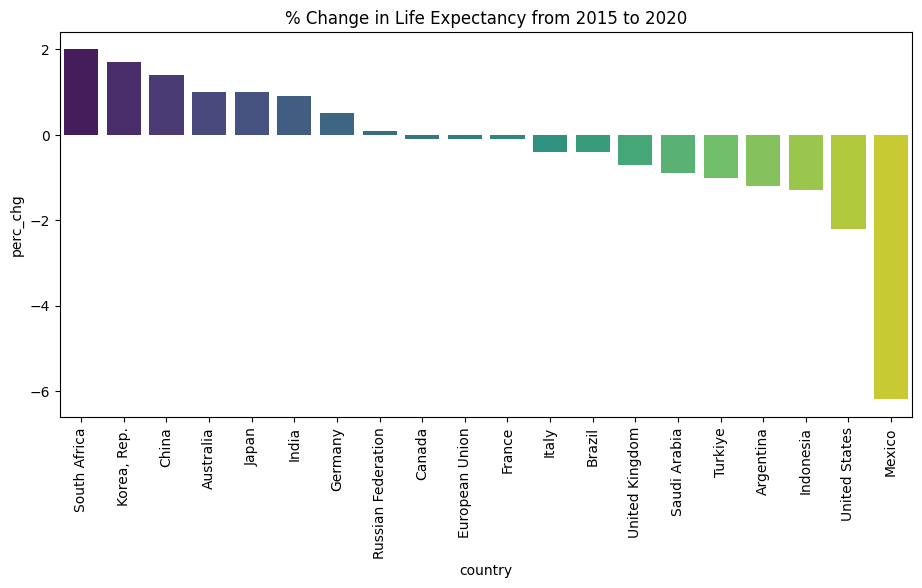

In [59]:
plt.figure(figsize=(11,5))
sns.barplot(x=life_expectancy.index, y=life_expectancy['perc_chg'], palette='viridis')
plt.title("% Change in Life Expectancy from 2015 to 2020")
plt.xticks(rotation =90)
plt.show()

## FDI (Foreign Direct Investment)

In [60]:
fdi = pd.pivot_table(columns='year_o', index='country', values='Foreign direct investment (FDI)', data=data, aggfunc='mean').round(1)
fdi['perc_chg'] = round((fdi[2020] - fdi[2015])*100/fdi[2015],1)
fdi = fdi.sort_values(ascending=False, by='perc_chg')

In [61]:
fdi

year_o,2015,2016,2017,2018,2019,2020,perc_chg
country,,,,,,,
Japan,0.1,0.8,0.4,0.5,0.8,1.2,1100.0
United Kingdom,1.5,12.1,4.7,-0.9,0.7,5.8,286.7
Germany,1.9,1.9,3.0,4.2,1.9,4.5,136.8
South Africa,0.4,0.7,0.5,1.4,1.3,0.9,125.0
"Korea, Rep.",0.3,0.8,1.1,0.7,0.6,0.5,66.7
Russian Federation,0.5,2.5,1.8,0.5,1.9,0.6,20.0
India,2.1,1.9,1.5,1.6,1.8,2.4,14.3
Mexico,3.0,3.5,2.8,3.0,2.3,2.8,-6.7
Indonesia,2.3,0.5,2.0,1.8,2.2,1.8,-21.7


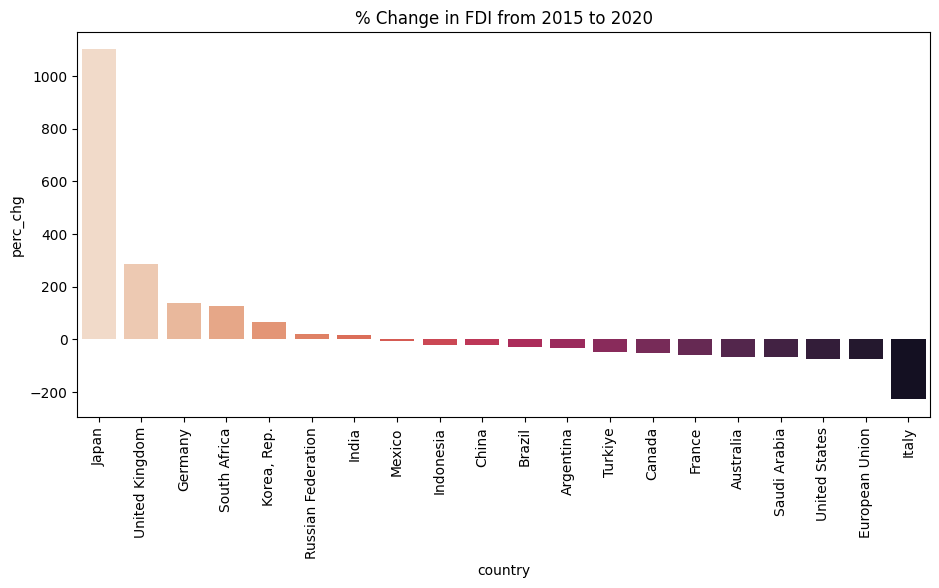

In [62]:
plt.figure(figsize=(11,5))
sns.barplot(x=fdi.index, y=fdi['perc_chg'], palette='rocket_r')
plt.title("% Change in FDI from 2015 to 2020")
plt.xticks(rotation =90)
plt.show()

## Exim (Explort-Import)

This line of code calculates the net export balance (net_exim_bal) by subtracting the value of imports of goods and services from the value of exports of goods and services for each entry in the data DataFrame. 

In [65]:
data['net_exim_bal'] = data['Exports of goods and services'] - data['Imports of goods and services']

In [66]:
data.head()

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,...,Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN,year_o,year,net_exim_bal
0,Argentina,2020-01-01,3.857405e+11,3.753441e+11,1.916184,11.460,42.0,75.892,95.328629,100.000000,...,16.605414,13.598284,14.415156,43.029265,108.57,385.740508,375.344057,2020,2020,3.007130
1,Argentina,2019-01-01,4.477547e+11,4.301668e+11,1.916184,9.840,35.5,77.284,95.328629,100.000000,...,17.924878,14.705737,14.210030,42.590779,112.42,447.754684,430.166792,2019,2019,3.219142
2,Argentina,2018-01-01,5.248199e+11,5.060940e+11,1.916184,9.220,32.0,76.999,95.328629,99.993736,...,14.436686,16.325850,16.613885,42.371536,97.51,524.819892,506.094045,2018,2018,-1.889164
3,Argentina,2017-01-01,6.436284e+11,6.272005e+11,1.916184,8.350,25.7,76.833,95.328629,100.000000,...,11.320283,13.969318,18.212567,42.986381,105.91,643.628393,627.200464,2017,2017,-2.649034
4,Argentina,2016-01-01,5.575323e+11,5.452516e+11,1.916184,8.085,30.3,76.308,95.328629,99.899742,...,12.527095,13.566793,17.663228,43.479495,100.95,557.532321,545.251641,2016,2016,-1.039698


In [68]:
exim = pd.pivot_table(index='country', columns='year', values='net_exim_bal', aggfunc='mean', data=data).round(2)
exim

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Argentina,-1.07,-1.04,-2.65,-1.89,3.22,3.01
Australia,-1.48,-2.27,0.51,0.36,2.47,3.79
Brazil,-1.15,0.40,0.72,0.39,-0.64,0.61
Canada,-2.46,-2.36,-2.19,-1.95,-1.47,-2.21
China,3.24,2.27,1.75,0.66,0.93,2.42
European Union,4.35,4.35,4.24,3.81,3.48,3.65
France,-0.57,-0.61,-1.06,-1.01,-0.96,-2.13
Germany,7.60,7.38,7.09,6.10,5.94,5.81
India,-2.30,-1.77,-3.16,-3.76,-2.58,-0.39


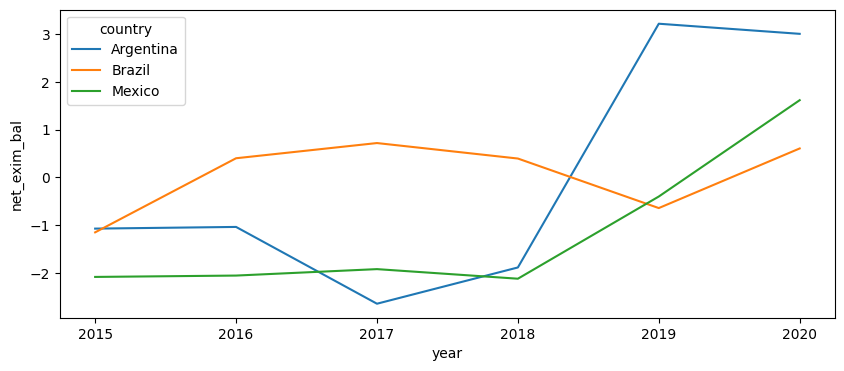

In [69]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='net_exim_bal', data=data[data['country'].isin(['Argentina', 'Brazil','Mexico'])], hue='country', ci=False)
plt.show()

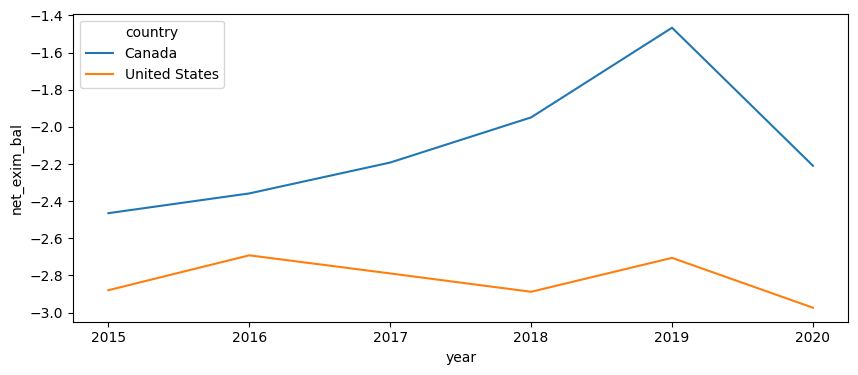

In [70]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='net_exim_bal', data=data[data['country'].isin(['Canada','United States'])], hue='country', ci=False)
plt.show()